## <font color=DarkTurquoise>Load Packages</font>

In [22]:
import pandas as pd
from transformers import pipeline
import re
from snownlp import SnowNLP
from snownlp import sentiment
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
import numpy as np


## <font color=DarkTurquoise>Load Packages</font>

In [23]:
file_path = "data/plot_summaries.txt" 
df = pd.read_csv(file_path, sep='\t', header=None, names=['Wikipedia movie ID', 'summary'])
df

,Wikipedia movie ID,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


<font color=Gray>We only retain sentences with more than three words and store each sentence as a separate column.</font>

In [ ]:
def split_sentences(summary):
    sentences = [s.strip() for s in re.split(r'[,:!;.]', summary) if s.strip()]
    # We keep only sentences with more than 3 words here
    filtered_sentences = [sentence for sentence in sentences if sentence.count(" ") > 3]
    return filtered_sentences

df['sentences'] = df['summary'].apply(split_sentences)

sentence_df = pd.DataFrame(df['sentences'].to_list())

result = pd.concat([df.drop(columns=['sentences']), sentence_df], axis=1)
result

,Wikipedia movie ID,summary,0,1,2,3,4,5,6,7,...,409,410,411,412,413,414,415,416,417,418
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",a hard-working taxi driver and Lyosha,develop a bizarre love-hate relationship,realize they aren't so different after all,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,31186339,The nation of Panem consists of a wealthy Capi...,The nation of Panem consists of a wealthy Capi...,As punishment for a past rebellion,each district must provide a boy and girl bet...,The tributes must fight to the death in an arena,the sole survivor is rewarded with fame and we...,12-year-old Primrose Everdeen is chosen from D...,Her older sister Katniss volunteers to take he...,a baker's son who once gave Katniss bread when...,...,None,None,None,None,None,None,None,None,None,None
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Poovalli Induchoodan is sentenced for six yea...,the only son of Justice Maranchery Karunakara ...,who had achieved top rank in Indian Civil Serv...,We learn in flashback that it was Ramakrishnan...,who had actually killed his classmate,Six years passes by and Manapally Madhavan Nam...,now a former state minister,who is all rage at the gross injustice meted o...,...,None,None,None,None,None,None,None,None,None,None
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",a New York City swindler,is illegally touting horses at a Florida racet...,the Kid comes across a beautiful,woman intending to bet a lot of money,The Kid convinces her to switch her bet,"the woman ""belongs"" to notorious gangster Moos...",The Kid's choice finishes dead last and a furi...,000 by Christmas Eve,...,None,None,None,None,None,None,None,None,None,None
4,595909,Seventh-day Adventist Church pastor Michael Ch...,Seventh-day Adventist Church pastor Michael Ch...,and their nine-week-old daughter Azaria are on...,With the baby sleeping in their tent,the family is enjoying a barbecue with their f...,Lindy returns to the tent to check on Azaria a...,When she discovers the infant is missing,everyone joins forces to search for her,It is assumed what Lindy saw was the animal ca...,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",The story is about Reema,a young Muslim schoolgirl in Malabar,who loved Malayalam and poetry,The film is about her mental trauma once she w...,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",director Leo Andreyev looks through photograp...,When he comes to the picture of an aged Sergiu...,then tells his assistant to cast the man,Sergius shows up at the Eureka Studio with a h...,another actor complains that his continual hea...,Sergius apologizes and explains that it is the...,The film then flashes back ten years to Czaris...,which is in the midst of the Communist Revolution,...,None,None,None,None,None,None,None,None,None,None
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,American Luthier focuses on Randy Parsons’ tra...,The guitar had been Parsons’ identity since he...,but after studying classical and jazz guitar i...,he realized that he would never make a living ...,So he gave it up — he didn’t even own a guitar...,Now Parsons is creating instruments that are h...,Jimmy Page and Joe Perry,This is a film is about someone who gave up th...,...,None,None,None,None,None,None,None,None,None,None
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",a middle-aged dry fruit seller from Afghanistan,comes to Calcutta to hawk his merchandise and ...,He puts up at a boarding house along with his ...,Since he is short of money he decides to sell ...,when he goes to collect his money,one of his customers abuses him and in the fig...,In the court Rehman's lawyer tries to ob

In [25]:
def calculate_sentiment(sentence):
    if sentence is None or pd.isna(sentence):
        return None  
    return SnowNLP(sentence).sentiments  
columns_to_analyze = [col for col in result.columns if col not in ["Wikipedia movie ID", "summary"]]
df_value = pd.DataFrame()
df_value["Wikipedia movie ID"] = result["Wikipedia movie ID"]
for column in columns_to_analyze:
    df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
    print(df_value[f"{column}_Sentiment"])
df_value.to_csv("sentiment_value.csv", index=False, encoding="utf-8")


0        0.440831
1        0.104404
2        0.589868
3        0.282735
4        0.371652
           ...   
42298    0.288393
42299    0.702902
42300    0.301488
42301    0.261930
42302    0.127358
Name: 0_Sentiment, Length: 42303, dtype: float64
0        0.282735
1        0.073076
2        0.050861
3        0.261930
4        0.389874
           ...   
42298    0.282735
42299    0.396490
42300    0.150701
42301    0.121190
42302    0.396490
Name: 1_Sentiment, Length: 42303, dtype: float64
0        0.500000
1        0.032100
2        0.553877
3        0.327199
4        0.421875
           ...   
42298    0.447678
42299    0.421875
42300    0.396490
42301    0.515657
42302    0.242138
Name: 2_Sentiment, Length: 42303, dtype: float64
0             NaN
1        0.247264
2        0.347473
3        0.037936
4        0.134485
           ...   
42298    0.177501
42299    0.111855
42300    0.175551
42301    0.097395
42302    0.421875
Name: 3_Sentiment, Length: 42303, dtype: float64
0           

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 100_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 101_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 102_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 103_Sentiment, Length: 42303, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 104_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 105_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 106_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 107_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 108_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 110_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 111_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 112_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 113_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 114_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 116_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 117_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 118_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 119_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 120_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 123_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 124_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 125_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 126_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 127_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 131_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 132_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 133_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 134_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 135_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 139_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 140_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 141_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 142_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 143_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 149_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 150_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 151_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 152_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 153_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 163_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 164_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 165_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 166_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 167_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 179_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 180_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 181_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 182_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 183_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 197_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 198_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 199_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 200_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 201_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 218_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 219_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 220_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 221_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 222_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 241_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 242_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 243_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 244_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 245_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 262_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 263_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 264_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 265_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 266_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 282_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 283_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 284_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 285_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 286_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 307_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 308_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 309_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 310_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 311_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 333_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 334_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 335_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 336_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 337_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 359_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 360_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 361_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 362_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 363_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 384_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 385_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 386_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 387_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 388_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_value[f"{column}_Sentiment"] = result[column].apply(calculate_sentiment)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3812\3754972629.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 410_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 411_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 412_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 413_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
42299   NaN
42300   NaN
42301   NaN
42302   NaN
Name: 414_Sentiment, Length: 42303, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42298   NaN
4

In [ ]:
file_path = "data/sentiment_value.csv"  # We save our results here
df = pd.read_csv(file_path)
df


,Wikipedia movie ID,0_Sentiment,1_Sentiment,2_Sentiment,3_Sentiment,4_Sentiment,5_Sentiment,6_Sentiment,7_Sentiment,8_Sentiment,...,409_Sentiment,410_Sentiment,411_Sentiment,412_Sentiment,413_Sentiment,414_Sentiment,415_Sentiment,416_Sentiment,417_Sentiment,418_Sentiment
0,23890098,0.440831,0.282735,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31186339,0.104404,0.073076,0.032100,0.247264,0.396490,0.225136,0.105781,0.096250,0.284774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20663735,0.589868,0.050861,0.553877,0.347473,0.473767,0.639565,0.327199,0.347473,0.301488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2231378,0.282735,0.261930,0.327199,0.037936,0.247264,0.371652,0.086331,0.447678,0.396490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,595909,0.371652,0.389874,0.421875,0.134485,0.101548,0.421875,0.447678,0.371652,0.242138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42298,34808485,0.288393,0.282735,0.447678,0.177501,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42299,1096473,0.702902,0.396490,0.421875,0.111855,0.164688,0.223390,0.418307,0.447678,0.421875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42300,35102018,0.301488,0.150701,0.396490,0.175551,0.452696,0.259172,0.421875,0.005370,0.060062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42301,8628195,0.261930,0.121190,0.515657,0.097395,0.473767,0.239522,0.171399,0.243452,0.212710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
cleaned_data = pd.read_csv('data/cleaned_data.csv')
df = df[df["Wikipedia movie ID"].isin(cleaned_data["Wikipedia movie ID"])]
df

,Wikipedia movie ID,0_Sentiment,1_Sentiment,2_Sentiment,3_Sentiment,4_Sentiment,5_Sentiment,6_Sentiment,7_Sentiment,8_Sentiment,...,409_Sentiment,410_Sentiment,411_Sentiment,412_Sentiment,413_Sentiment,414_Sentiment,415_Sentiment,416_Sentiment,417_Sentiment,418_Sentiment
1,31186339,0.104404,0.073076,0.032100,0.247264,0.396490,0.225136,0.105781,0.096250,0.284774,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2231378,0.282735,0.261930,0.327199,0.037936,0.247264,0.371652,0.086331,0.447678,0.396490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,595909,0.371652,0.389874,0.421875,0.134485,0.101548,0.421875,0.447678,0.371652,0.242138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1952976,0.247264,0.447678,0.147186,0.473767,0.150744,0.421875,0.259407,0.324056,0.396490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,24225279,0.267326,0.396490,0.371652,0.686440,0.615016,0.379763,0.473767,0.347473,0.228238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42269,13348400,0.162684,0.421875,0.347473,0.173489,0.341212,0.421875,0.279841,0.396490,0.205699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42270,24005728,0.576279,0.023112,0.347473,0.134485,0.304511,0.347473,0.279841,0.371652,0.304511,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42273,277160,0.371652,0.371652,0.358616,0.179650,0.304511,0.327199,0.189069,0.164688,0.039461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42284,677389,0.121190,0.223390,0.347473,0.282735,0.473767,0.447678,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cluster labels: [0 1 0 0 0 0 0 2 2 0 0 1 0 2 0 0 0 2 0 1]


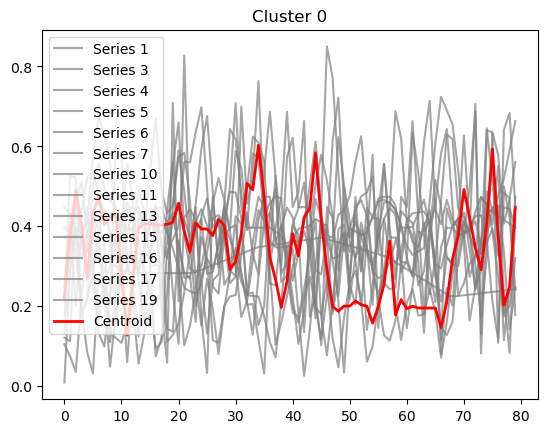

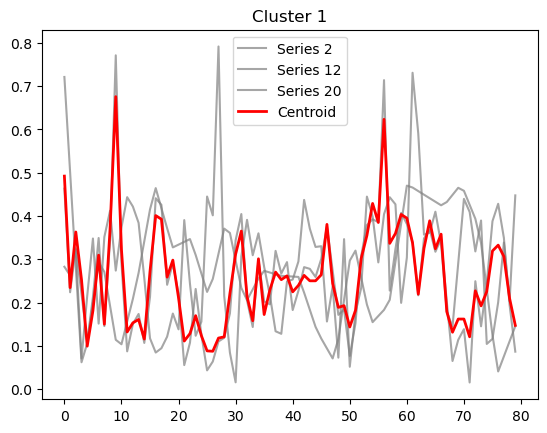

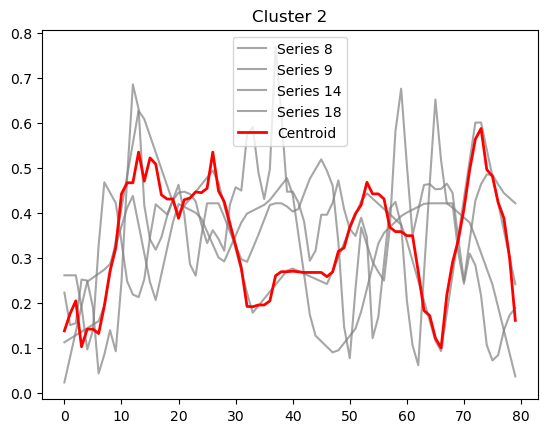

In [ ]:
import pandas as pd
import numpy as np
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

df = df.head(100) 

# Exclude the Wikipedia movie ID column
time_series_data = df.drop(columns=["Wikipedia movie ID"])

# Find the length of the longest sequence
max_len = max(len(row.dropna()) for _, row in time_series_data.iterrows())

# Interpolate and fill missing values
interpolated_series = []
for _, row in time_series_data.iterrows():
    row = row.dropna().values  # Remove missing values
    x_original = np.linspace(0, 1, len(row))  # Original sequence's evenly distributed positions
    x_new = np.linspace(0, 1, max_len)  # Target length's evenly distributed positions for interpolation
    interpolator = interp1d(x_original, row, kind='linear', fill_value="extrapolate")
    interpolated_series.append(interpolator(x_new))  # Interpolation results

formatted_series = to_time_series_dataset(interpolated_series)

# Perform time-series clustering
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels = model.fit_predict(formatted_series)

print("Cluster labels:", labels)

# Visualize the time series for each cluster
for cluster in range(3):
    plt.figure()
    for i, label in enumerate(labels):
        if label == cluster:
            plt.plot(formatted_series[i].ravel(), color='gray', alpha=0.7, label=f"Series {i+1}")
    plt.plot(model.cluster_centers_[cluster].ravel(), color='red', linewidth=2, label="Centroid")
    plt.title(f"Cluster {cluster}")
    plt.legend()
    plt.show()


[2 2 0 2 0 3 0 0 3 2 0 2 0 3 0 2 2 1 2 3]


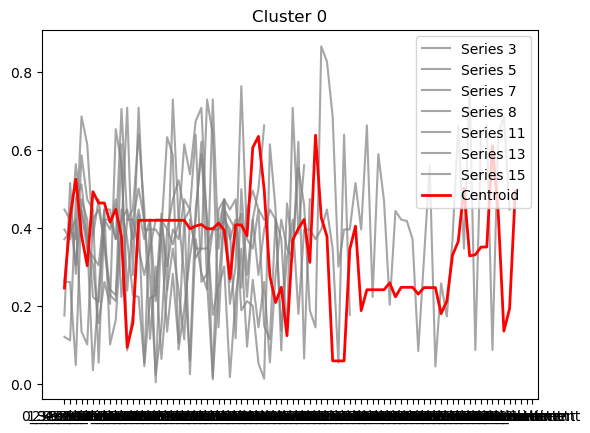

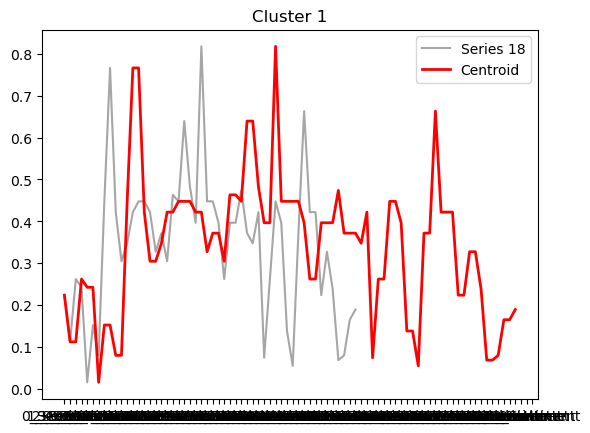

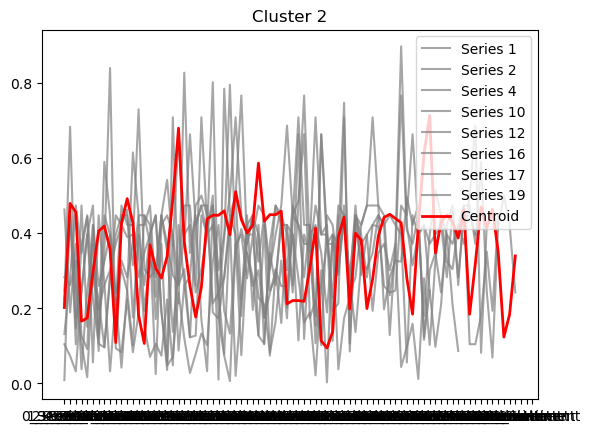

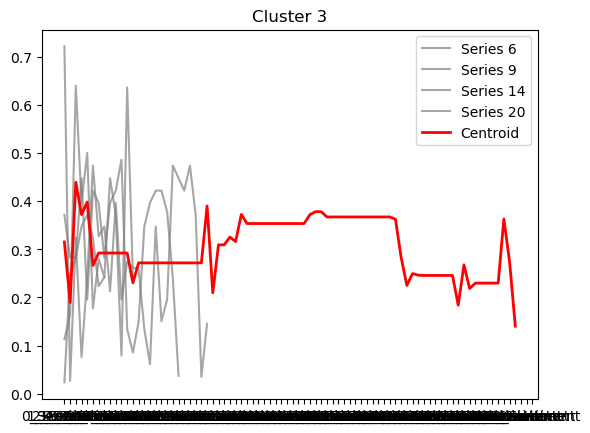

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
df = df.head(100) 
time_series_data = df.drop(columns=["Wikipedia movie ID"])

formatted_series = to_time_series_dataset(time_series_data.values)

model = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0)
labels = model.fit_predict(formatted_series)
print(labels)
centroids = model.cluster_centers_

for cluster in range(4):
    plt.figure()
    for i, label in enumerate(labels):
        if label == cluster:
            plt.plot(time_series_data.iloc[i], color='gray', alpha=0.7, label=f"Series {i+1}")
    plt.plot(centroids[cluster].ravel(), color='red', linewidth=2, label="Centroid")
    plt.title(f"Cluster {cluster}")
    plt.legend()
    plt.show()


In [26]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
results = classifier(["We are very happy to show you the 🤗 Transformers library.",
                      "We hope you don't hate it."])
print(results)




No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9997795224189758}, {'label': 'NEGATIVE', 'score': 0.530863881111145}]
